In [1]:
%matplotlib inline


Basic Atlas plotting
=======================

Plot the regions of a reference atlas (here the Automated Anatomical Labeling atlas).



Retrieving the atlas data
-------------------------



In [3]:
from nilearn import datasets

dataset = datasets.fetch_atlas_aal('SPM12')
atlas_filename = dataset.maps

print('Atlas ROIs are located at: %s' % atlas_filename)


Dataset created in /home/lou/nilearn_data/aal_SPM12



Downloaded 335872 of 351343 bytes (95.6%,    1.0s remaining)

Atlas ROIs are located at: /home/lou/nilearn_data/aal_SPM12/aal/atlas/AAL.nii


Downloaded 351343 of 351343 bytes (100.0%,    0.0s remaining) ...done. (25 seconds, 0 min)
Extracting data from /home/lou/nilearn_data/aal_SPM12/a2fc9a441ebe10d638e4a74b1d3c1dac/aal_for_SPM12.tar.gz..... done.


In [52]:
import nibabel as nib
img = nib.load(atlas_filename)

In [82]:
nodes = image.index_img(atlas_filename, [3, 4, 5, 6])

DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a 3D image. See http://nilearn.github.io/manipulating_images/input_output.html.

Visualizing the Automated Anatomical Labeling atlas
------------------------------------



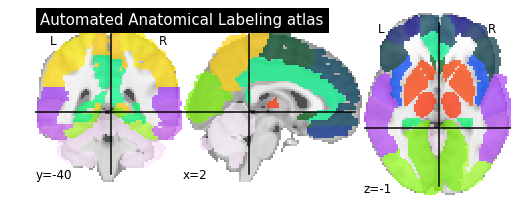

In [56]:
from nilearn import plotting

plotting.plot_roi(img, title="Automated Anatomical Labeling atlas")
plotting.show()

Extracting Certain Labels from Atlas
------------------------------------

In [24]:
from nilearn import regions

tmp = regions.connected_label_regions(atlas_filename, labels=["Amygdala_L"])

plotting.plot_roi(tmp)

ValueError: The number of labels: 1 provided as input in labels=['Amygdala_L'] does not match with the number of unique labels in labels_img: 116. Please provide appropriate match with unique number of labels in labels_img.